<a href="https://colab.research.google.com/github/ChoYeongjo/book-pytorch-ai-app-practice/blob/main/250908_book_AI_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

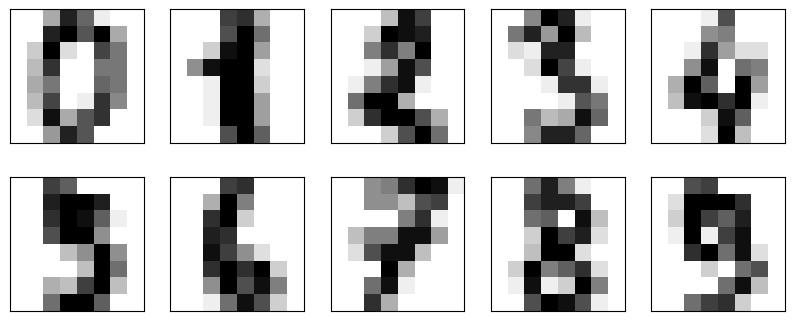

데이터의 형태:  (1797, 64)
레이블의 형태:  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data=datasets.load_digits()

n_img=10
plt.figure(figsize=(10,4))
for i in range(n_img):
  ax=plt.subplot(2,5,i+1)
  ax.imshow(digits_data.data[i].reshape(8,8), cmap='gray_r')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

print("데이터의 형태: ",digits_data.data.shape)
print("레이블의 형태: ",digits_data.target[:n_img])

In [ ]:
import torch
from sklearn.model_selection import train_test_split

digit_images=digits_data.data
lables=digits_data.target

# X_train, X_test, y_train, y_test=train_test_split(digit_images, lables)
x_train, x_test, t_train, t_test=train_test_split(digit_images, lables)

In [ ]:
# X_train.shape, X_train.dtype, type(X_train)

((1347, 64), dtype('float64'), numpy.ndarray)

In [ ]:
x_train=torch.tensor(x_train, dtype=torch.float32)
x_test=torch.tensor(x_test, dtype=torch.float32)
t_train=torch.tensor(t_train, dtype=torch.int64)
t_test=torch.tensor(t_test, dtype=torch.int64)

In [ ]:
from torch import nn
net=nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


In [ ]:
from torch import optim
loss=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(), lr=0.01)

record_loss_train=[]
record_loss_test=[]

for i in range(1000):
  optimizer.zero_grad()

  #순전파
  y_pred_train=net(x_train)
  y_pred_test=net(x_test)

  # 오차 기록 및 계산
  loss_train=loss(y_pred_train, t_train)
  loss_test=loss(y_pred_test, t_test)
  record_loss_train.append(loss_train.item())
  record_loss_test.append(loss_test.item())

  #역전파
  loss_train.backward()
  #파라미터 갱신
  optimizer.step()

  if i%200==0:
    print(f"Epoch: {i}, Loss_Train: {loss_train.item():.3f}, Loss_Test:{loss_test.item():.3f}")

Epoch: 0, Loss_Train: 2.778, Loss_Test:2.826
Epoch: 200, Loss_Train: 0.306, Loss_Test:0.338
Epoch: 400, Loss_Train: 0.152, Loss_Test:0.191
Epoch: 600, Loss_Train: 0.105, Loss_Test:0.147
Epoch: 800, Loss_Train: 0.081, Loss_Test:0.127


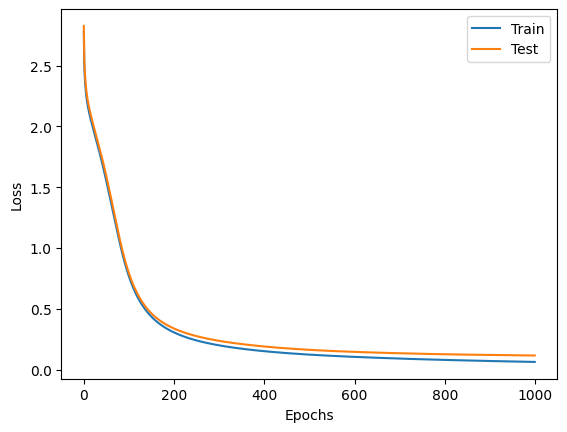

In [ ]:
plt.plot(range(len(record_loss_train)), record_loss_train, label='Train')
plt.plot(range(len(record_loss_test)), record_loss_test, label='Test')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
y_pred_test=net(x_test)
count=(y_pred_test.argmax(1)==t_test).sum().item()
print(f"Accuracy: {count/len(t_test):.5f}")

Accuracy: 0.96222


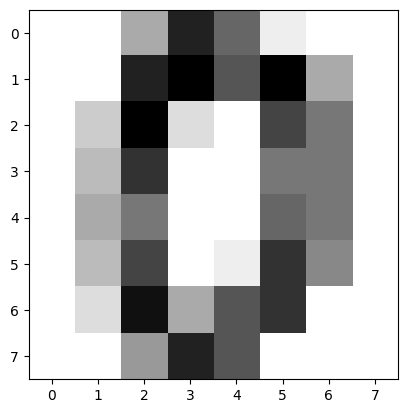

정답: 0  예측결과:  0


In [ ]:
#p.108
img_id=0
x_pred=digit_images[img_id]
image=x_pred.reshape(8,8)
plt.imshow(image, cmap='gray_r')
plt.show()

x_pred=torch.tensor(x_pred, dtype=torch.float32)
y_pred=net(x_pred)
print("정답:", lables[img_id]," 예측결과: ", y_pred.argmax().item())

In [ ]:
#4.1 자동미분 p.120
import torch
x=torch.ones(2,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y=x+2
print(y)
print(y.grad_fn)

tensor([[3., 3., 3.],
        [3., 3., 3.]], grad_fn=<AddBackward0>)


In [ ]:
z=y*3
print(z)
out=z.mean()
print(out)

tensor([[9., 9., 9.],
        [9., 9., 9.]], grad_fn=<MulBackward0>)
tensor(9., grad_fn=<MeanBackward0>)


In [ ]:
#4.1.3 경사계산
a=torch.tensor([1.0], requires_grad=True)
b=a*2
b.backward()
print(a.grad)

tensor([2.])


In [ ]:
def calc(a):
  b=a*2+1
  c=b*b
  d=c/(c+2)
  e=d.mean()
  return e

x=[1.0,2.0,3.0]
x=torch.tensor(x,requires_grad=True)
y=calc(x)
y.backward()
print(x.grad)

tensor([0.0661, 0.0183, 0.0072])


In [ ]:
#p.127 미세한 변화로 backward()로 나온값 검증
delta=0.001
x=[1.0, 2.0, 3.0]
x=torch.tensor(x)
y=calc(x)

x_1=[1.0+delta, 2.0, 3.0]
x_1=torch.tensor(x_1)
y_1=calc(x_1)

x_2=[1.0, 2.0+delta, 3.0]
x_2=torch.tensor(x_2)
y_2=calc(x_2)

x_3=[1.0, 2.0, 3.0+delta]
x_3=torch.tensor(x_3)
y_3=calc(x_3)

grad_1=(y_1-y)/delta
grad_2=(y_2-y)/delta
grad_3=(y_3-y)/delta

print(grad_1, grad_2, grad_3)
grads=torch.stack([grad_1, grad_2, grad_3])
print(grads)

tensor(0.0660) tensor(0.0183) tensor(0.0072)
tensor([0.0660, 0.0183, 0.0072])


In [1]:
#p.125 4.1.3 경사계산
import torch
a=torch.tensor([1.0], requires_grad=True)
b=a*2
b.backward()
print(a.grad)

tensor([2.])


In [2]:
def calc(a):
  b=a*2 +1
  c=b*b
  d=c/(c+2)
  e=d.mean()
  return e

x=[1.0, 2.0, 3.0]
x=torch.tensor(x, requires_grad=True)
y=calc(x)
y.backward()
print(x.grad)

tensor([0.0661, 0.0183, 0.0072])


In [3]:
#미세 변화 검증
delta=0.001
x=[1.0,2.0,3.0]
x=torch.tensor(x)
y=calc(x)

x_1=[1.0+delta, 2.0, 3.0]
x_1=torch.tensor(x_1)
y_1=calc(x_1)

x_2=[1.0, 2.0+delta, 3.0]
x_2=torch.tensor(x_2)
y_2=calc(x_2)

x_3=[1.0, 2.0, 3.0+delta]
x_3=torch.tensor(x_3)
y_3=calc(x_3)

grad_1=(y_1-y)/delta
grad_2=(y_2-y)/delta
grad_3=(y_3-y)/delta

print(grad_1, grad_2, grad_3)
grads=torch.stack([grad_1, grad_2, grad_3])
print(grads)

tensor(0.0660) tensor(0.0183) tensor(0.0072)
tensor([0.0660, 0.0183, 0.0072])


In [4]:
#4.2 에포크와 배치 p.129
#torchvision dataset
from torchvision.datasets import MNIST
from torchvision import transforms

img_size=28
mnist_train=MNIST("./data",train=True, download=True, transform=transforms.ToTensor())
mnist_test=MNIST("./data",train=False, download=True, transform=transforms.ToTensor())


100%|██████████| 9.91M/9.91M [00:00<00:00, 53.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.73MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.7MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.87MB/s]

60000 10000


In [5]:
print(len(mnist_train), len(mnist_test))

60000 10000


In [6]:
#데이타 로더 설정

from torch.utils.data import DataLoader

batch_size=256
train_loader=DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

In [7]:
#모델 구축
import torch.nn as nn

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(img_size*img_size, 1024)
    self.fc2=nn.Linear(1024,512)
    self.fc3=nn.Linear(512,10)
    self.relu=nn.ReLU()

  def forward(self, x):
    x=x.view(-1, img_size*img_size)
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x

net=Net()
net.cuda()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (relu): ReLU()
)


In [8]:
#4.3.4 학습
from torch import optim
loss_fnc=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(), lr=0.01)

record_loss_train=[]
record_loss_test=[]

for i in range(10):
  net.train()
  loss_train=0
  for j, (x,t) in enumerate(train_loader):
    x,t=x.cuda(), t.cuda()
    y=net(x)
    loss=loss_fnc(y, t)
    loss_train += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  loss_train /= j+1
  record_loss_train.append(loss_train)

  net.eval()
  loss_test=0
  for j ,(x,t) in enumerate(test_loader):
    x,t=x.cuda(), t.cuda()
    y=net(x)
    loss=loss_fnc(y,t)
    loss_test += loss.item()
  loss_test /= j+1
  record_loss_test.append(loss_test)

  if i%1==0:
    print(f"Epoch: {i} Loss_Train: {loss_train:.4f} Loss_Test: {loss_test:.4f}")

Epoch: 0 Loss_Train: 2.2169 Loss_Test: 2.0928
Epoch: 1 Loss_Train: 1.8298 Loss_Test: 1.4488
Epoch: 2 Loss_Train: 1.1150 Loss_Test: 0.8245
Epoch: 3 Loss_Train: 0.7138 Loss_Test: 0.5916
Epoch: 4 Loss_Train: 0.5574 Loss_Test: 0.4901
Epoch: 5 Loss_Train: 0.4795 Loss_Test: 0.4314
Epoch: 6 Loss_Train: 0.4331 Loss_Test: 0.3959
Epoch: 7 Loss_Train: 0.4024 Loss_Test: 0.3701
Epoch: 8 Loss_Train: 0.3797 Loss_Test: 0.3515
Epoch: 9 Loss_Train: 0.3624 Loss_Test: 0.3377


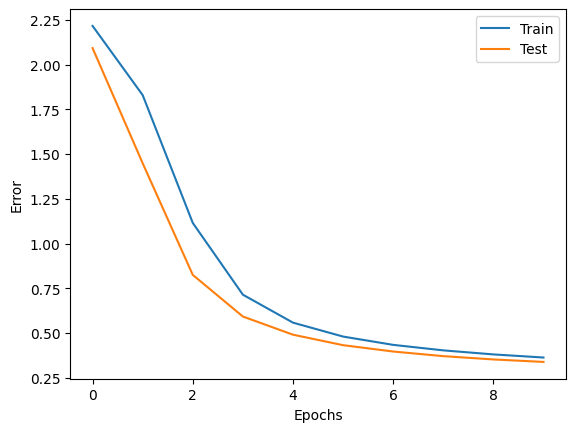

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(len(record_loss_train)), record_loss_train, label='Train')
plt.plot(range(len(record_loss_test)), record_loss_test, label='Test')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [10]:
#4.3.6 정답률
correct=0
total=0
net.eval()
for i,(x,t) in enumerate(test_loader):
  x,t=x.cuda(), t.cuda()
  y=net(x)
  correct+=(y.argmax(1)==t).sum().item()
  total+=len(x)
print(f"Accuracy: {correct/total:.4f}")

Accuracy: 0.9041


In [ ]:
#이 책 기본 미니배치 예시


#4.2 에포크와 배치 p.129
#torchvision dataset
from torchvision.datasets import MNIST
from torchvision import transforms

img_size=28
mnist_train=MNIST("./data",train=True, download=True, transform=transforms.ToTensor())
mnist_test=MNIST("./data",train=False, download=True, transform=transforms.ToTensor())

#데이타 로더 설정
from torch.utils.data import DataLoader
batch_size=256
train_loader=DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

#모델 구축
import torch.nn as nn

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(img_size*img_size, 1024)
    self.fc2=nn.Linear(1024,512)
    self.fc3=nn.Linear(512,10)
    self.relu=nn.ReLU()

  def forward(self, x):
    x=x.view(-1, img_size*img_size)
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x

net=Net()
net.cuda()
print(net)

#4.3.4 학습
from torch import optim
loss_fnc=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(), lr=0.01)

record_loss_train=[]
record_loss_test=[]

for i in range(10):
  net.train()
  loss_train=0
  for j, (x,t) in enumerate(train_loader):
    x,t=x.cuda(), t.cuda()
    y=net(x)
    loss=loss_fnc(y, t)
    loss_train += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  loss_train /= j+1
  record_loss_train.append(loss_train)

  net.eval()
  loss_test=0
  for j ,(x,t) in enumerate(test_loader):
    x,t=x.cuda(), t.cuda()
    y=net(x)
    loss=loss_fnc(y,t)
    loss_test += loss.item()
  loss_test /= j+1
  record_loss_test.append(loss_test)

  if i%1==0:
    print(f"Epoch: {i} Loss_Train: {loss_train:.4f} Loss_Test: {loss_test:.4f}")

# 학습상황 시각화
import matplotlib.pyplot as plt
plt.plot(range(len(record_loss_train)), record_loss_train, label='Train')
plt.plot(range(len(record_loss_test)), record_loss_test, label='Test')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

#4.3.6 정답률
correct=0
total=0
net.eval()
for i,(x,t) in enumerate(test_loader):
  x,t=x.cuda(), t.cuda()
  y=net(x)
  correct+=(y.argmax(1)==t).sum().item()
  total+=len(x)
print(f"Accuracy: {correct/total:.4f}")

In [11]:
# 파이토치 튜토리얼 같은 코드
# 퀵스타트 https://tutorials.pytorch.kr/beginner/basics/quickstart_tutorial.html
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

#데이터셋 받기
training_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

#데이터 로더
batch_size=64
train_dataloader=DataLoader(training_data, batch_size=batch_size)
test_dataloader=DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break

#여기까지 퀵가이드 -> 데이터를 불러오는 방법(https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 303kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.58MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 16.3MB/s]

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [14]:
#모델 만들기 퀵가이드 이어서

device=(
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten=nn.Flatten()
    self.linear_relu_stack=nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )
  def forward(self, x):
    x=self.flatten(x)
    logits=self.linear_relu_stack(x)
    return logits

model=NeuralNetwork().to(device)
print(model)
#여기까지 퀵가이드 -> PyTorch에서 신경망을 정의하는 방법(https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [15]:
# 퀵가이드 모델 매개변수 최적화하기
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
  siez